## Bombcell getting started script

to do:
- JF: add MATLAB changes (spikeGLX meta)
- JF: generate output plots
- move all the squeeze() and astype() to the loading function
- what are the errors / warnings in the main function?
- how to load output, check and modify param, then re-generate + save
- double check no hard-coding
- double check all python names are copies of MATLAB with snake_case
- check comments & function headers

### Load in python packages 

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add bombcell to Python path if NOT installed with pip
demo_dir = Path(os.getcwd())
pyBombCell_dir = demo_dir.parent
sys.path.append(str(pyBombCell_dir))

In [7]:
%load_ext autoreload
%autoreload 2

import bombcell as bc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define data paths

By default: path to BombCell's toy dataset

In [3]:
ks_dir = r"c:\Users\Experiment\Data\BC_dev_data\kilosort2_noPhy\site1" # demo_dir / "toy_data"  # Replace with your kilosort directory
raw_dir = (
    r"c:\Users\Experiment\Data\BC_dev_data\JF093_2023-03-06_site1\site1\_bc_decompressed.bin" #None  # Leave 'None' if no raw data
)
save_path = "test"  # Replace with the directory in which you want to save bombcell's output

#raw_file = "/home/netshare/znas-lab/Share/JulieF/for_sam/JF093_2023-03-06_site1/site1/2023-03-06_JF093_1_g0_t0_bc_decompressed.imec0.ap.bin"

# If a raw data directory with a meta folder is not given,
# please input the gain manually
gain_to_uV = np.nan

### Get parameters

In [4]:
# ephys_raw_data and gain_to_uv will be None if no raw_dir given
ephys_raw_data, meta_path, gain_to_uV = bc.manage_if_raw_data(raw_dir, gain_to_uV)

param = bc.get_default_parameters(ks_dir, raw_file=ephys_raw_data, ephys_meta_dir=meta_path)
param["compute_distance_metrics"] = 0
param["compute_drift"] = 0
param["compute_time_chunks"] = 0

Using found decompressed data _bc_decompressed.bin


### Run bombcell, get unit types and save results 
To save results as a parquet either PyArrow or FastParquet needs to be installed

Loading file test\templates._bc_rawWaveforms.npy... Done!
No splits/merges detected


Computing bombcell quality metrics:   0%|          | 0/486 units

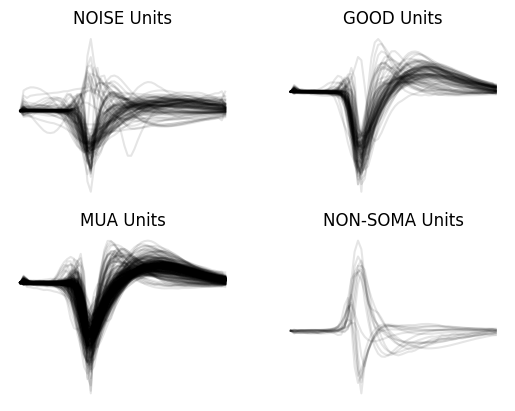

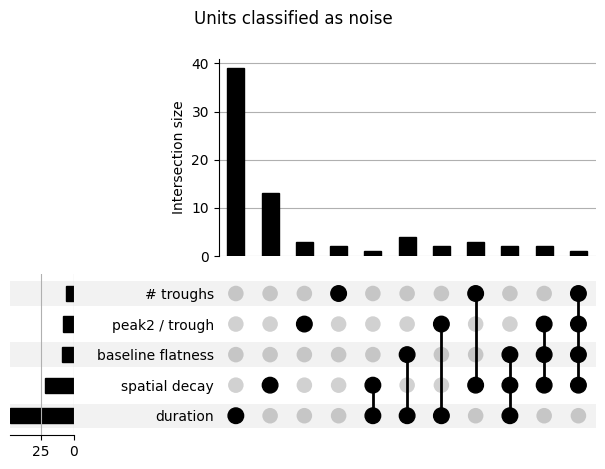

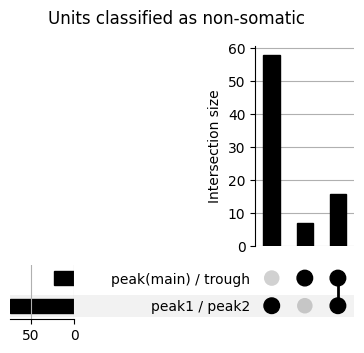

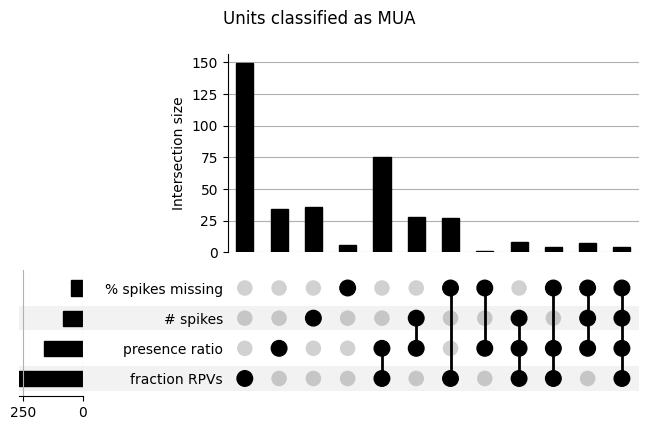

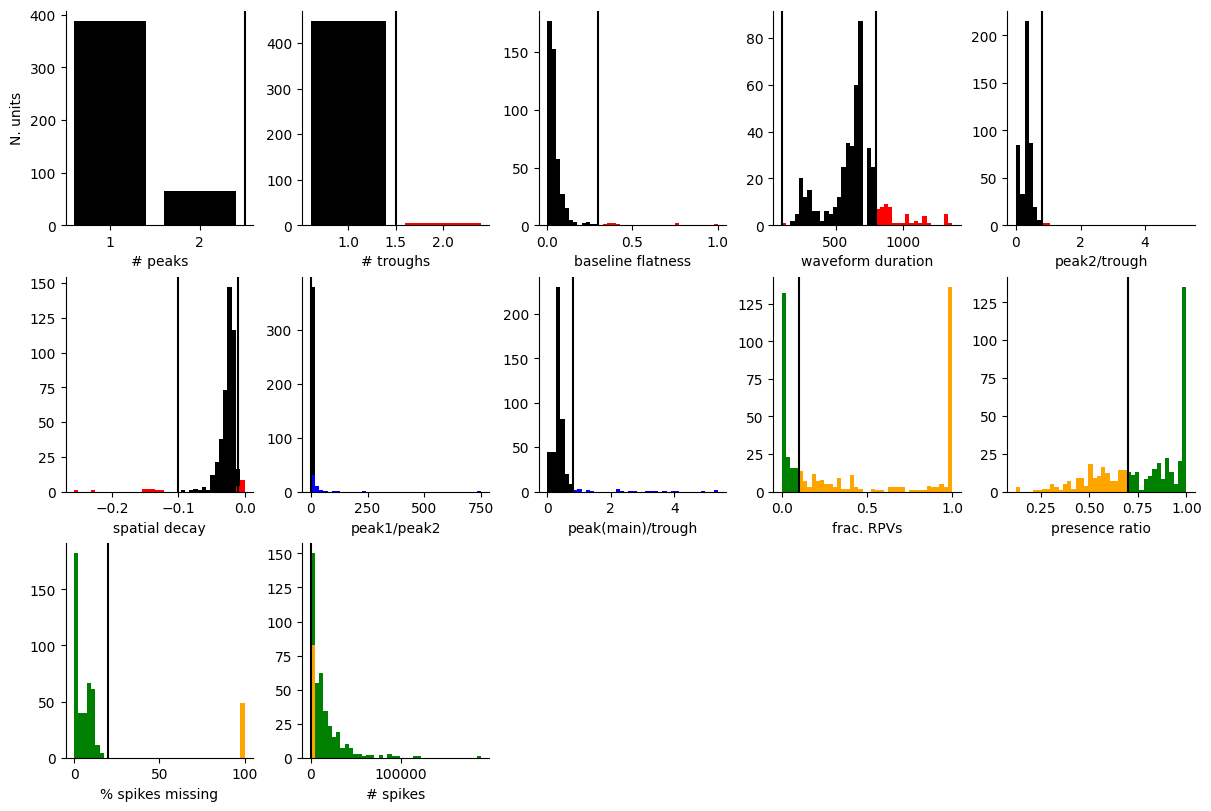

All expected metrics were successfully saved.


In [5]:
param['re_extract_raw'] = False
(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, raw_dir, save_path, param
)

(optional) look at a table which shows why each unit fails

In [8]:
qm_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
qm_table



,unit_type,Original ID,NaN result,# peaks,# troughs,duration,baseline flatness,peak2 / trough,spatial decay,# spikes,% spikes missing,presence ratio,fraction RPVs,amplitude,SNR,non somatic,peak(main) / trough,peak1 / peak2
0,MUA,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,NOISE,1,False,False,True,False,True,True,True,False,True,False,True,False,False,True,True,False
2,MUA,2,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
3,MUA,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,MUA,4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,MUA,486,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
482,GOOD,487,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
483,MUA,488,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
484,MUA,489,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
